# Notebook Contents

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
     
#### 3. Job Title Analysis
#### 4. Location Analysis

# 1. Importing Libraries and Data

In [3]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
#Import Data
df = pd.read_csv('/Users/buketoztekin/Documents/Cleaned_Salaries_Data.csv')

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,US,100,US,M
...,...,...,...,...,...,...,...,...,...
10653,2020,SE,FT,Data Scientist,412000,US,100,US,L
10654,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
10655,2020,EN,FT,Data Scientist,105000,US,100,US,S
10656,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# 2. Exploring Relationships


In [6]:
#Create a subset of the numerical columns
sub_numerical = df[['work_year', 'salary_in_usd', 'remote_ratio']]

In [7]:
sub_numerical

,work_year,salary_in_usd,remote_ratio
0,2024,59615,100
1,2024,252000,0
2,2024,168000,0
3,2024,199500,100
4,2024,86700,100
...,...,...,...
10653,2020,412000,100
10654,2021,151000,100
10655,2020,105000,100
10656,2020,100000,100


In [8]:
# Create a correlation matrix using pandas

sub_numerical.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.111336,-0.231788
salary_in_usd,0.111336,1.000000,-0.061362
remote_ratio,-0.231788,-0.061362,1.000000


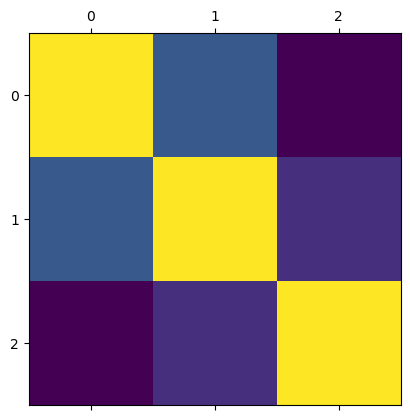

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_numerical.corr())
plt.show()

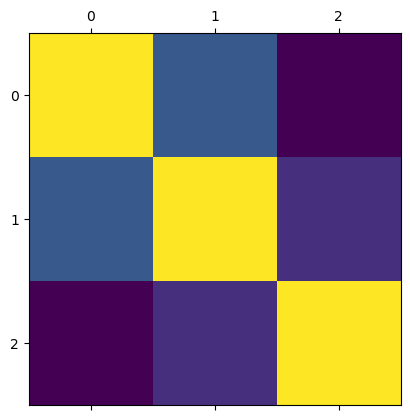

In [10]:
# Save figure
plt.matshow(sub_numerical.corr())
plt.savefig("out.png") 

In [11]:
#current dir
cwd = os.getcwd()
cwd

'/Users/buketoztekin/Documents/Salaries Analysis /03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

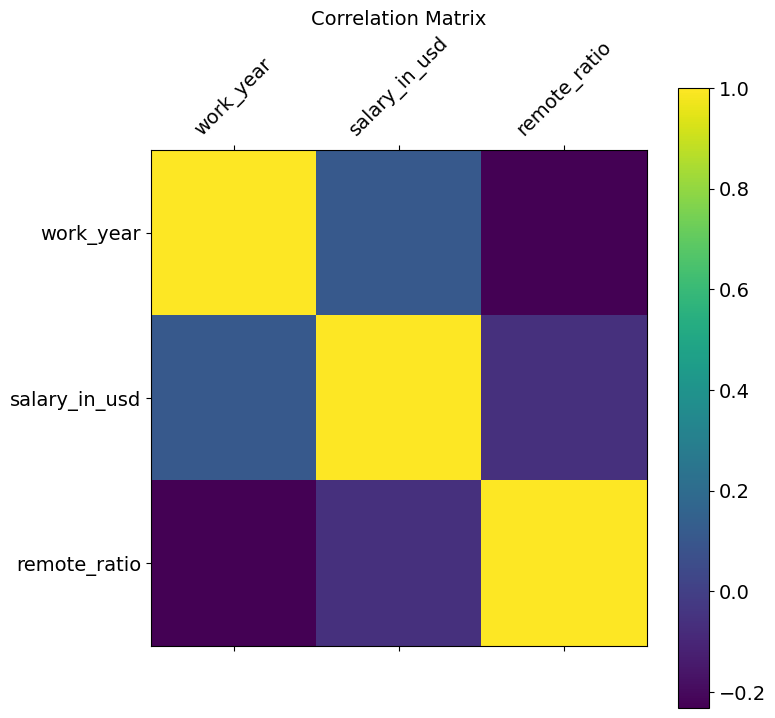

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_numerical.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_numerical.shape[1]), sub_numerical.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_numerical.shape[1]), sub_numerical.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [13]:
# Create a correlation matrix
corr_matrix = sub_numerical.corr()

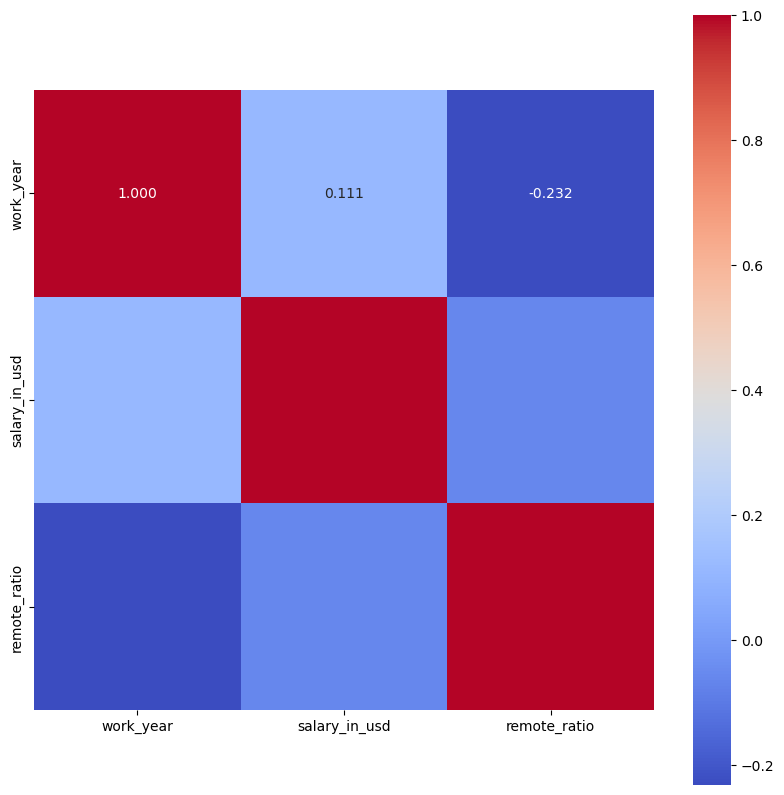

In [14]:
# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, square=True)
plt.show()

### Note on the heatmap
The heatmap shows that there is no meaningful relationships between any of the variables.

### Creating scatterlots to see the relationships between the numerical variables

Although the other variables, except for salary_in_usd, are categorical, they are treated as numerical to observe any potential trends.

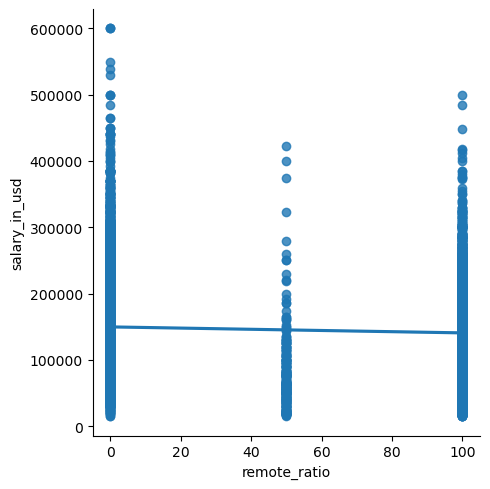

In [15]:
# Create a scatterplot for the "salary_in_usd" and "remote_ratio" columns in seaborn

sns.lmplot(x = 'remote_ratio', y = 'salary_in_usd', data = df)


The highest earners appear to be full-time workers. (Note that full-time workers represent the largest group in the data, making it harder to compare them with other types of workers.)

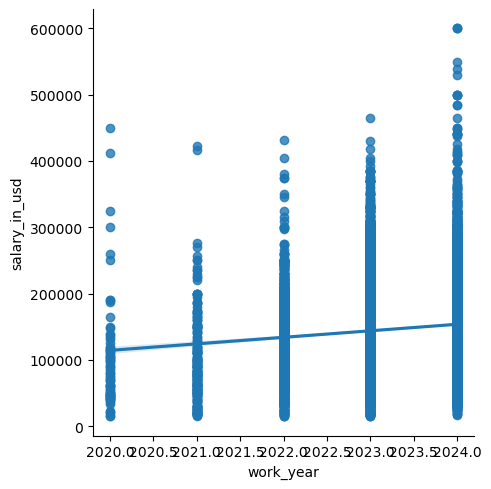

In [16]:
# Create a scatterplot for the "salary_in_usd" and "work_year" columns in seaborn

sns.lmplot(x = 'work_year', y = 'salary_in_usd', data = df)

The highest salaries are paid in 2024, which is expected due to factors such as inflation, increased demand for specialized skills, and the natural progression of salary growth over time. Additionally, most of the data is concentrated in 2023 and 2024, which further skews the analysis toward more recent, higher-paying roles. This might also reflect the trend of rising compensation in the AI/ML sector.

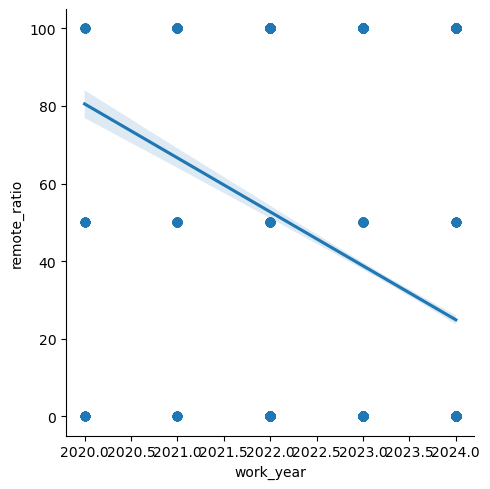

In [17]:
# Create a scatterplot for the "remote_ratio" and "work_year" columns in seaborn

sns.lmplot(x = 'work_year', y = 'remote_ratio', data = df)

The remote work ratio has been decreasing from 2020 to 2024. This could be due to companies increasingly returning to in-office or hybrid models as the impact of the pandemic lessens, along with the growing push for in-person collaboration. Factors like changing company policies, industry demands, and regional regulations may also play a role.

### Analysing remote ratio 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


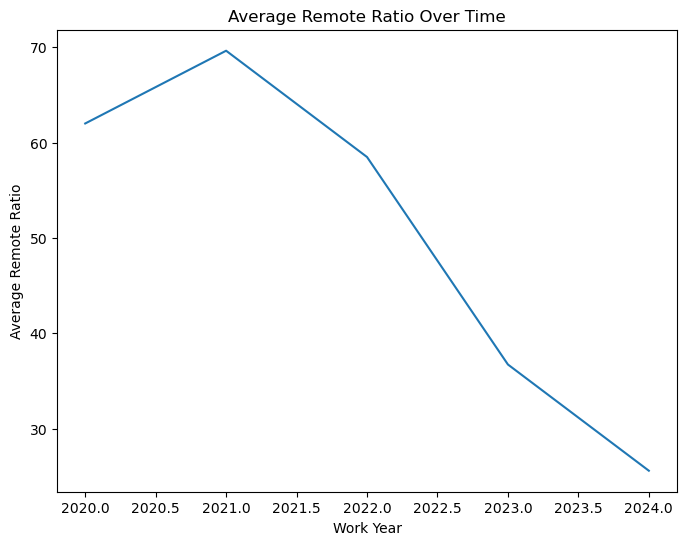

In [18]:
# Group data by work year and calculate the mean remote ratio for each year
mean_remote_ratio_per_year = df.groupby('work_year')['remote_ratio'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='work_year', y='remote_ratio', data=mean_remote_ratio_per_year)

# Add labels and title
plt.xlabel('Work Year')
plt.ylabel('Average Remote Ratio')
plt.title('Average Remote Ratio Over Time')

# Show the plot
plt.show()

When we look at the average remote ratio, we observe an increase from 2020 to 2021, likely driven by the global shift to remote work during the pandemic. However, starting in 2022, the ratio began to decrease significantly and has continued to decline through 2024. This suggests that companies may be transitioning back to in-office work models as the world adapts to post-pandemic conditions.

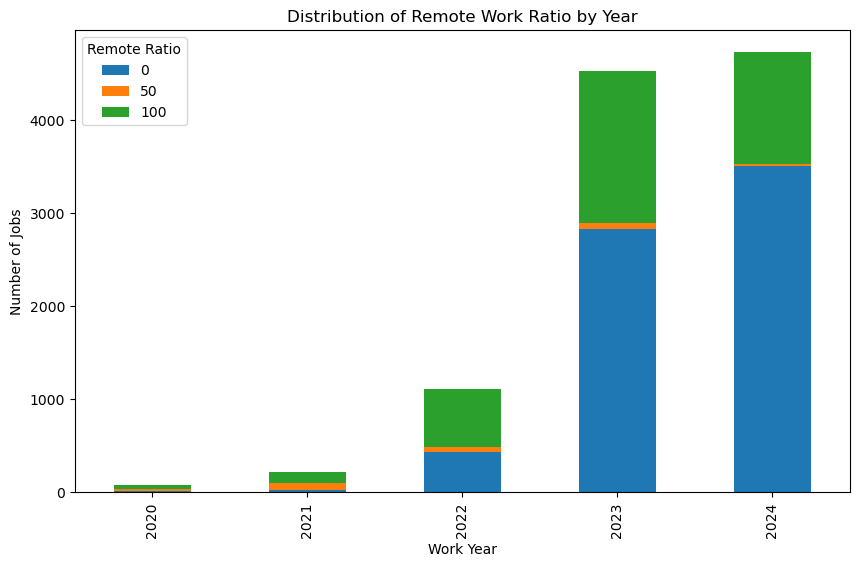

In [19]:
# Count the occurrences of each remote_ratio for each work_year
remote_ratio_counts = df.groupby(['work_year', 'remote_ratio']).size().unstack().fillna(0)

# Create a stacked bar plot
remote_ratio_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Work Year')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Remote Work Ratio by Year')
plt.legend(title='Remote Ratio')
plt.show()

## Categorical Plot

### Creating salary categories to understand salary trends

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Count'>

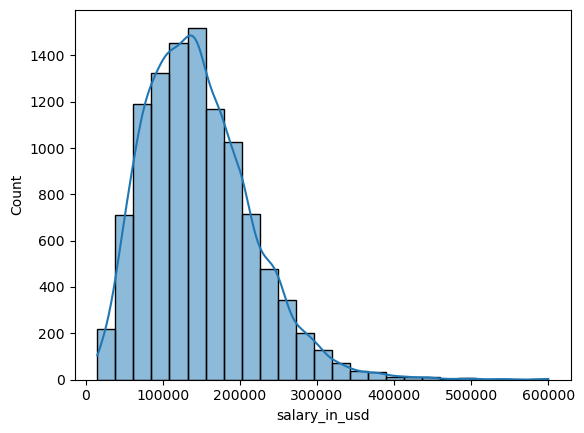

In [20]:
# Create a histogram to visualize the distribution of the salaries

sns.histplot(df['salary_in_usd'], bins = 25, kde = True)

In [21]:
df.loc[df['salary_in_usd'] < 100000, 'Salary category'] = 'Low salary'

In [22]:
df.loc[(df['salary_in_usd'] >= 100000) & (df['salary_in_usd'] < 250000), 'Salary category'] = 'Middle salary'

In [23]:
df.loc[df['salary_in_usd'] >= 250000, 'Salary category'] = 'High salary'

In [24]:
df['Salary category'].value_counts(dropna = False)

Salary category
Middle salary    6948
Low salary       2861
High salary       849
Name: count, dtype: int64

In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'Salary category'],
      dtype='object')

### Company size and salary

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


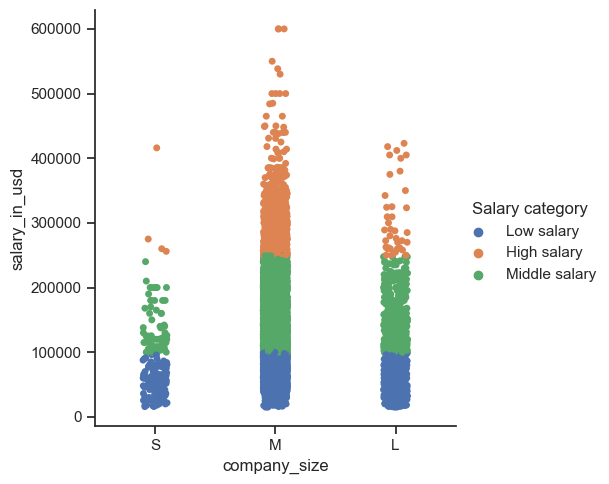

In [26]:
# Create a categorical plot in seaborn using the salary categories created above

sns.set(style="ticks")
g = sns.catplot(x="company_size", y="salary_in_usd", hue="Salary category", data=df)

We can see that medium and large companies offer the highest salaries, although all company sizes have similar distributions at the lower salary levels. In contrast, small companies tend to pay mostly within the low to middle salary range, indicating fewer high-paying roles compared to their larger counterparts.

### Remote ratio and salary

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


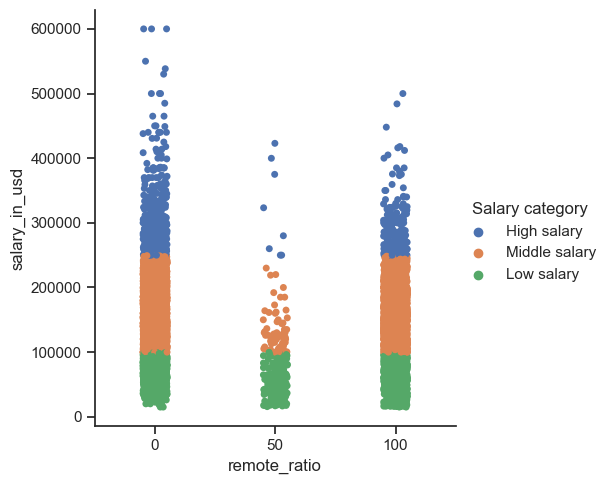

In [27]:
# Create a categorical plot in seaborn using the salary categories created above

sns.set(style="ticks")
g = sns.catplot(x="remote_ratio", y="salary_in_usd", hue="Salary category", data=df)

Due to the very small sample size for hybrid positions, it's difficult to make a meaningful comparison with on-site and fully remote positions. This limited data makes it challenging to draw reliable conclusions about salary trends and work patterns for hybrid roles. 

### Experience level and salary

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


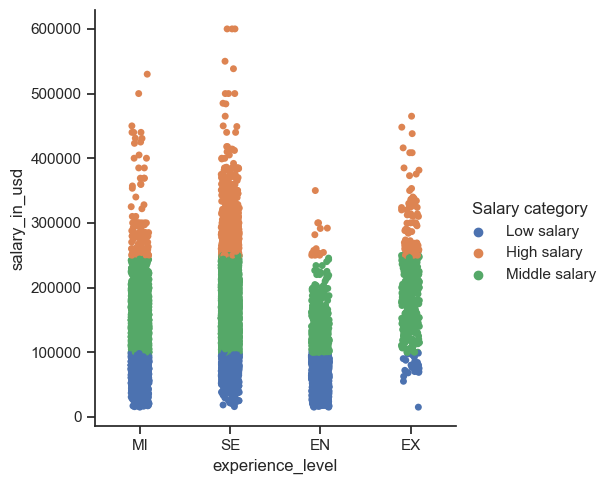

In [28]:
# Create a categorical plot in seaborn using the salary categories created above

sns.set(style="ticks")
g = sns.catplot(x="experience_level", y="salary_in_usd", hue="Salary category", data=df)

Executive and Senior roles have the highest salary ranges, with Executive roles rarely offering low salaries. Other roles, particularly at the middle and entry levels, show a broader distribution, with more salaries falling in the low and middle ranges. Middle and entry-level positions have significantly fewer high-paying roles compared to Executive and Senior positions.

## 3. Job Title Analysis

In [29]:
# Get the top 10 most popular job titles (roles) by frequency
top_10_popular_roles = df['job_title'].value_counts().head(10)

# Display the results
print("Top 10 Most Popular Roles:")
print(top_10_popular_roles)

Top 10 Most Popular Roles:
job_title
Data Scientist                   2319
Data Engineer                    1948
Data Analyst                     1461
Machine Learning Engineer        1119
Research Scientist                402
Analytics Engineer                360
Data Architect                    304
Research Engineer                 255
Business Intelligence Analyst     178
Applied Scientist                 163
Name: count, dtype: int64


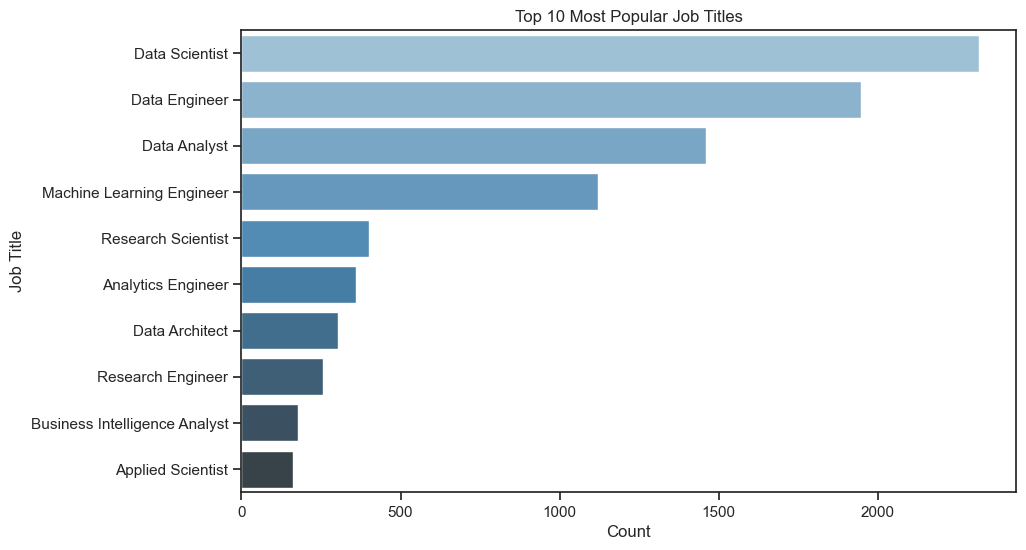

In [30]:
# Get the top 10 most popular roles
top_10_popular_roles = df['job_title'].value_counts().head(10)

# Create the bar plot for most popular roles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_popular_roles.values, y=top_10_popular_roles.index, palette="Blues_d")

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Most Popular Job Titles')

# Show the plot
plt.show()

The most popular job titles across all years are displayed in the graph above. A temporal analysis will be conducted later to explore differences between the years. The top three roles—Data Scientist, Data Engineer, and Data Analyst—stand out. However, it's important to note that these titles are broad, and while some individuals provided more specific job descriptions, others used these general terms, which may affect the accuracy of the role distribution.

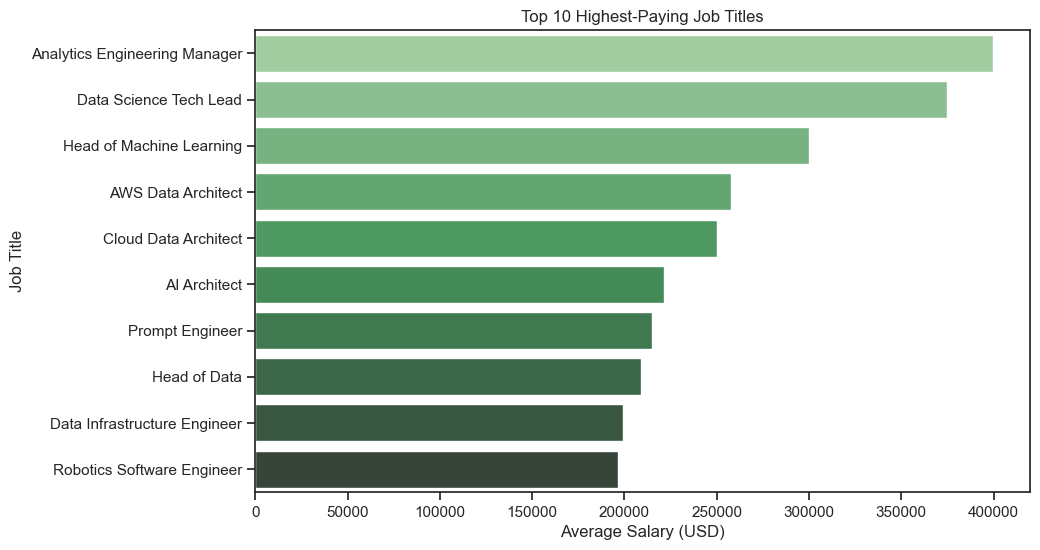

In [31]:
# Get the top 10 highest-paying roles by average salary
top_10_highest_paying_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Create the bar plot for highest-paying roles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_highest_paying_roles.values, y=top_10_highest_paying_roles.index, palette="Greens_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest-Paying Job Titles')

# Show the plot
plt.show()

In [32]:
# Get the top 10 highest-paying job titles (roles) by average salary
top_10_highest_paying_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Highest-Paying Roles:")
print(top_10_highest_paying_roles)

Top 10 Highest-Paying Roles:
job_title
Analytics Engineering Manager    399880.000000
Data Science Tech Lead           375000.000000
Head of Machine Learning         299758.428571
AWS Data Architect               258000.000000
Cloud Data Architect             250000.000000
AI Architect                     221388.785714
Prompt Engineer                  215083.736842
Head of Data                     208976.720000
Data Infrastructure Engineer     199467.708333
Robotics Software Engineer       196500.000000
Name: salary_in_usd, dtype: float64


Top 10 highest paying job titles across all years can be seen above.

In [33]:
# Get the 10 lowest-paying job titles (roles) by average salary
lowest_paying_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True).head(10)

# Display the results
print("Lowest-Paying Roles:")
print(lowest_paying_roles)

Lowest-Paying Roles:
job_title
AI Software Development Engineer    25210.000000
Principal Data Architect            38154.000000
CRM Data Analyst                    40000.000000
Compliance Data Analyst             45000.000000
Quantitative Research Analyst       51000.000000
Machine Learning Specialist         55000.000000
Insight Analyst                     56785.111111
BI Data Engineer                    60000.000000
Sales Data Analyst                  60000.000000
Admin & Data Analyst                61805.500000
Name: salary_in_usd, dtype: float64


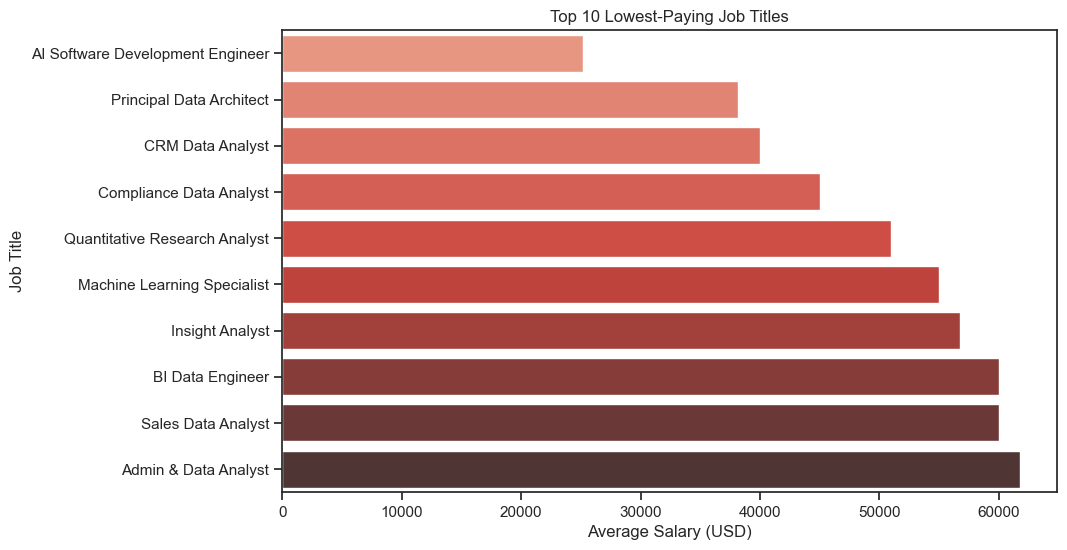

In [34]:
# Get the 10 lowest-paying job titles (roles) by average salary
lowest_paying_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True).head(10)

# Create a bar plot for the lowest-paying roles
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_paying_roles.values, y=lowest_paying_roles.index, palette="Reds_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Lowest-Paying Job Titles')

# Show the plot
plt.show()

The lowest-paying job titles appear to be specific roles, which may have very small sample sizes. This limited representation could skew the average salaries for these positions, making it difficult to draw reliable conclusions about their true compensation levels.

## 4. Location Analysis

In [35]:
# Get the top 10 company locations by average salary
top_10_locations_by_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Display the table
print("Top 10 Company Locations by Average Salary:")
print(top_10_locations_by_salary)

Top 10 Company Locations by Average Salary:
company_location
QA    300000.000000
IL    189772.250000
PR    167500.000000
US    156393.206589
NZ    146761.250000
SA    139999.333333
CA    139845.949309
EG    138727.272727
AU    124672.452830
CH    124646.888889
Name: salary_in_usd, dtype: float64


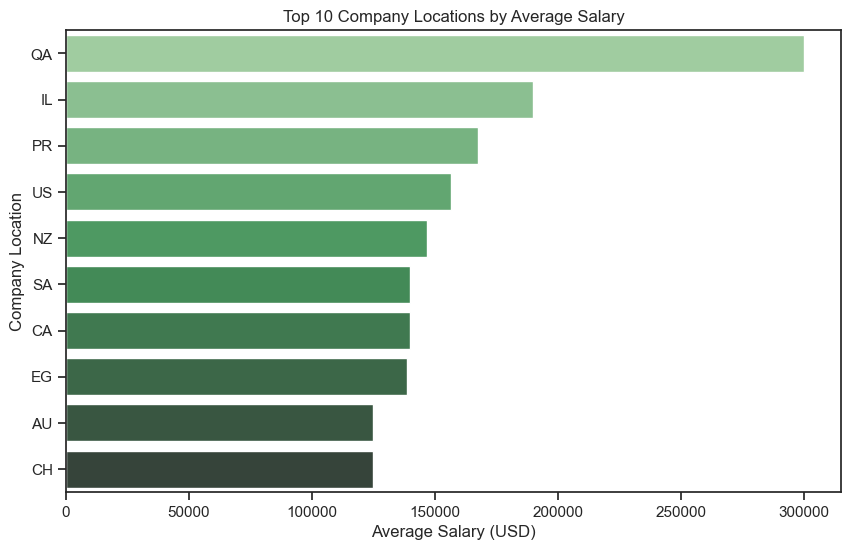

In [36]:
# Create a bar plot for the top 10 company locations by average salary
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations_by_salary.values, y=top_10_locations_by_salary.index, palette="Greens_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Location')
plt.title('Top 10 Company Locations by Average Salary')

# Show the plot
plt.show()

QA: Qatar
IL: Israel
PR: Puerto Rico
US: United States
NZ: New Zealand
SA: Saudi Arabia
CA: Canada
EG: Egypt
AU: Australia
CH: Switzerland

In [37]:
# Get the top 10 employee locations by average salary
top_10_employee_locations_by_salary = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Display the table
print("Top 10 Employee Locations by Average Salary:")
print(top_10_employee_locations_by_salary)

Top 10 Employee Locations by Average Salary:
employee_residence
QA    300000.000000
IL    262515.000000
MY    200000.000000
PR    166000.000000
US    156824.954721
NZ    146761.250000
CA    140254.444444
SA    139999.333333
CH    137187.500000
EG    133000.000000
Name: salary_in_usd, dtype: float64


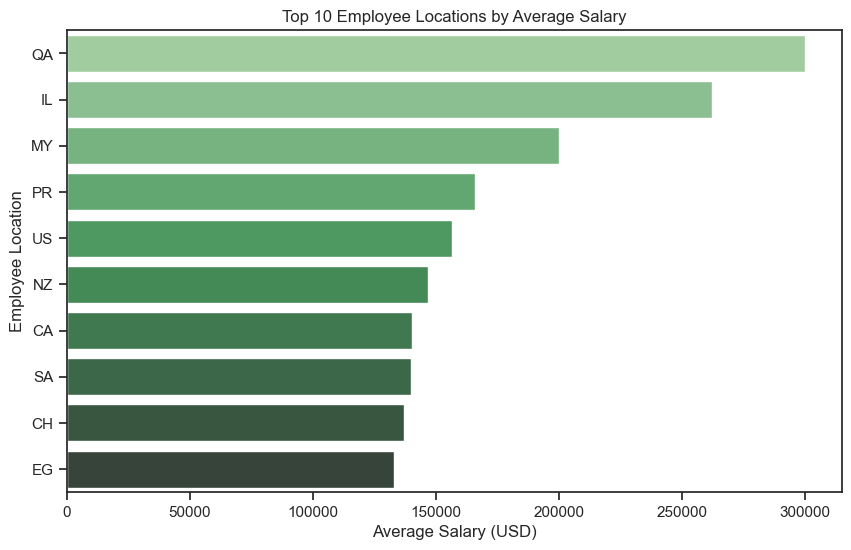

In [38]:
# Create a bar plot for the top 10 employee locations by average salary
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_employee_locations_by_salary.values, y=top_10_employee_locations_by_salary.index, palette="Greens_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Employee Location')
plt.title('Top 10 Employee Locations by Average Salary')

# Show the plot
plt.show()

QA: Qatar
IL: Israel
MY: Malaysia
PR: Puerto Rico
US: United States
NZ: New Zealand
CA: Canada
SA: Saudi Arabia
CH: Switzerland
EG: Egypt

## Focusing on 2023 and 2024

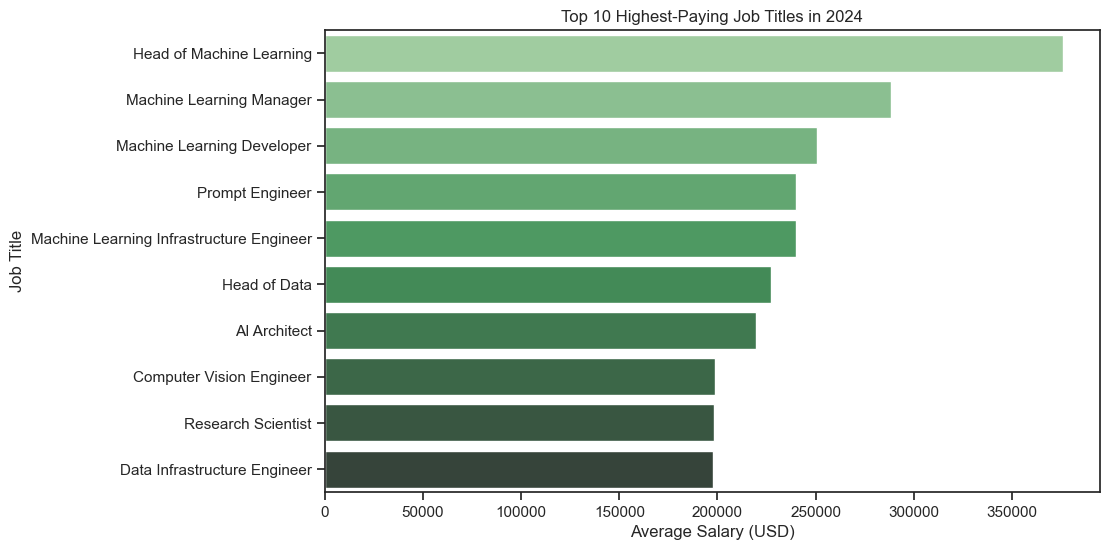

In [39]:
# Filter the dataset for 2024
df_2024 = df[df['work_year'] == 2024]

# Get the top 10 highest-paying roles by average salary for 2024
top_10_highest_paying_roles_2024 = df_2024.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Create the bar plot for highest-paying roles in 2024
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_highest_paying_roles_2024.values, y=top_10_highest_paying_roles_2024.index, palette="Greens_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest-Paying Job Titles in 2024')

# Show the plot
plt.show()

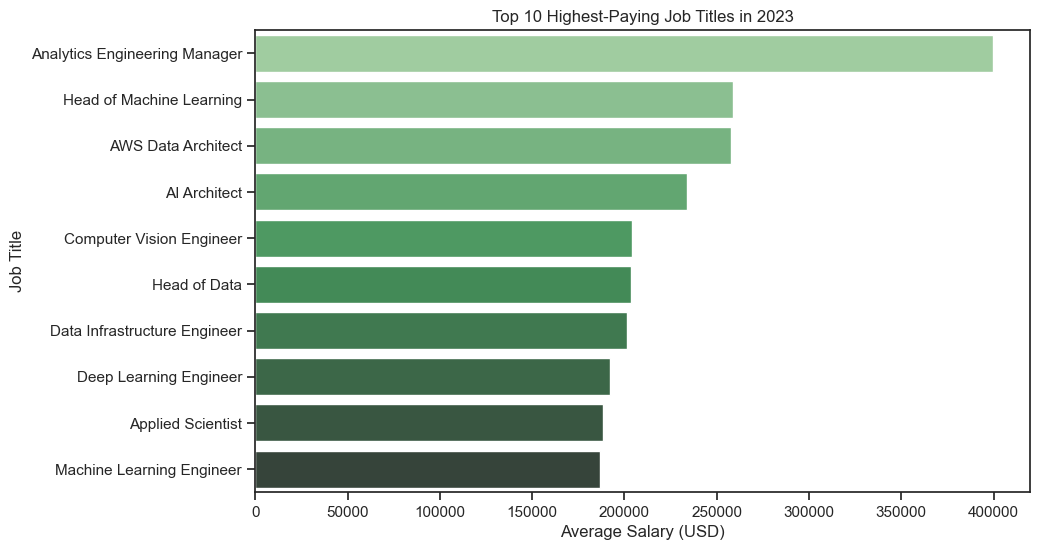

In [41]:
# Filter the dataset for 2023
df_2023 = df[df['work_year'] == 2023]

# Get the top 10 highest-paying roles by average salary for 2024
top_10_highest_paying_roles_2023 = df_2023.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Create the bar plot for highest-paying roles in 2024
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_highest_paying_roles_2023.values, y=top_10_highest_paying_roles_2023.index, palette="Greens_d")

# Add labels and title
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest-Paying Job Titles in 2023')

# Show the plot
plt.show()

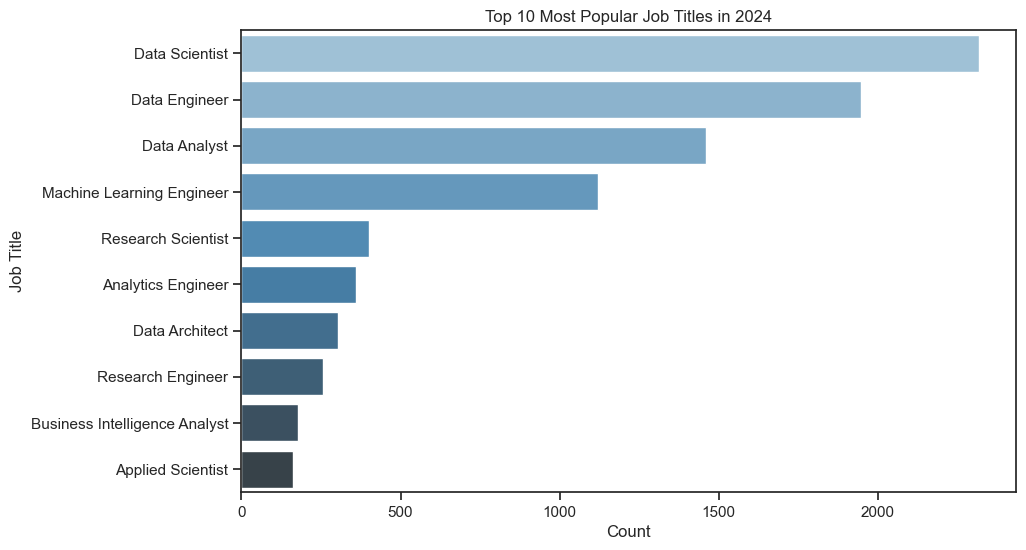

In [40]:
# Get the top 10 most popular roles in 2024
top_10_popular_roles_in_2024 = df_2024['job_title'].value_counts().head(10)

# Create the bar plot for most popular roles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_popular_roles.values, y=top_10_popular_roles.index, palette="Blues_d")

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Most Popular Job Titles in 2024')

# Show the plot
plt.show()

# Additional Analysis with USA, FT subset

In [43]:
#Import Data
usa_ft_subset = pd.read_csv('/Users/buketoztekin/Documents/usa_ft_subset.csv')

In [44]:
usa_ft_subset.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded
0,2024,SE,FT,AI Developer,252000,US,0,US,M,2
1,2024,SE,FT,AI Developer,168000,US,0,US,M,2
2,2024,MI,FT,Data Scientist,199500,US,100,US,M,1
3,2024,MI,FT,Data Scientist,86700,US,100,US,M,1
4,2024,SE,FT,Research Engineer,180000,US,0,US,S,2
